# Proyek Analisis Data: [Bike dataset]
- **Nama:** [Jovan Hadinata]
- **Email:** [2022105359@student.kalbis.ac.id]
- **ID Dicoding:** [rafejovan]

## Menentukan Pertanyaan Bisnis

- Seperti apa pola penyewaan sepeda berdasarkan hari dalam seminggu atau waktu tertentu dalam sehari?
- Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan pengguna terdaftar jika dilihat berdasarkan hari dalam seminggu dan waktu tertentu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd  # Digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Digunakan untuk membuat visualisasi statis, interaktif, dan animasi
import seaborn as sns  # Digunakan untuk membuat grafik statistik

## Data Wrangling

### Gathering Data

In [2]:
# Mengimpor modul drive dari library google.colab untuk mengakses Google Drive
from google.colab import drive

# Mount Google Drive ke direktori '/content/drive' dengan force_remount=True, untuk memastikan drive di-mount ulang meskipun sudah ter-mount sebelumnya.
drive.mount('/content/drive', force_remount=True)

# Menentukan path ke file 'hour.csv' di Google Drive
file_path_hour = '/content/drive/MyDrive/hour.csv'

# Membaca data dari file CSV menggunakan pandas dan menyimpannya dalam DataFrame bernama 'data_hour'
data_hour = pd.read_csv(file_path_hour)

# Menampilkan 5 baris pertama dari DataFrame 'data_hour' untuk melihat pratinjau data
data_hour.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Mengimpor modul drive dari library google.colab untuk mengakses Google Drive
from google.colab import drive

# Mount Google Drive ke direktori '/content/drive' dengan force_remount=True
# untuk memastikan drive di-mount ulang meskipun sudah ter-mount sebelumnya.
drive.mount('/content/drive', force_remount=True)

# Menentukan path ke file 'day.csv' di Google Drive
file_path_day = '/content/drive/MyDrive/day.csv'

# Membaca data dari file CSV menggunakan pandas dan menyimpannya dalam DataFrame bernama 'data_day'
data_day = pd.read_csv(file_path_day)

# Menampilkan 5 baris pertama dari DataFrame 'data_day' untuk melihat pratinjau data
data_day.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kode diatas digunakan untuk menghubungkan Google Drive ke Google Colab, memungkinkan akses langsung ke dataset yang disimpan di Drive untuk digunakan dalam analisis data.
- Dari kedua tabel tersebut terdapat data yaitu temp, hum, dan windspeed tersedia di kedua dataset, memungkinkan analisis hubungan cuaca terhadap penggunaan sepeda. Adanya pengguna casual dan registered memungkinkan eksplorasi pola berbeda antar segmen pengguna. Informasi ini dapat memberikan gambaran yang berguna bagi penyedia layanan sepeda untuk membuat strategi pemasaran yang lebih efektif

### Assessing Data

In [4]:
# Fungsi untuk assessing data
def assess_data(df, name):
    print(f"--- {name.upper()} ---")
    print(f"Dimensi Dataset: {df.shape}\n")  # Dimensi dataset

    # Menggunakan info() untuk memberikan gambaran umum tentang DataFrame
    print("\nGambaran Umum Dataset (info):")
    print(df.info())  # Menampilkan informasi mengenai jumlah non-null dan tipe data per kolom

    # Menampilkan statistik deskriptif dengan describe()
    print("\nStatistik Deskriptif:")
    print(df.describe())  # Statistik deskriptif untuk kolom numerik


    # Memeriksa apakah ada duplikasi data
    print("\nJumlah Duplikasi Data:")
    print(df.duplicated().sum())  # Menampilkan jumlah duplikat

    # Memeriksa nilai yang hilang (NaN) per kolom
    print("\nJumlah Nilai Hilang (NaN) Per Kolom:")
    print(df.isna().sum())  # Menampilkan jumlah nilai NaN per kolom

    # Menampilkan tipe data yang perlu diubah
    print("\nTipe Data yang Perlu Diubah:")
    for col in df.columns:
        if df[col].dtype == 'object' and col != 'dteday':  # Mengecualikan kolom 'dteday'
            print(f"- {col}: Sebaiknya diubah menjadi tipe data category")
        elif col == 'dteday':
            print(f"- {col}: Sebaiknya diubah menjadi tipe data datetime")

    print("-" * 50)

# Melakukan assessing untuk masing-masing dataset
assess_data(data_day, "Dataset Day")
assess_data(data_hour, "Dataset Hour")

--- DATASET DAY ---
Dimensi Dataset: (731, 16)


Gambaran Umum Dataset (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Statisti

Insight:

Dataset Day dan Dataset Hour:
- Tidak ditemukan missing values pada kedua dataset.

- Tidak ditemukan data duplikat pada kedua dataset.

- Tipe data kolom dteday pada kedua dataset adalah object dan perlu diubah

- menjadi datetime untuk analisis dan visualisasi data terkait waktu.

- Kolom-kolom dengan data kategorikal seperti season, yr, mnth, holiday, weekday, workingday, dan weathersit (dan hr untuk dataset hour) sebaiknya diubah menjadi tipe data category untuk efisiensi memori dan mempermudah analisis.

### Cleaning Data

In [5]:
# Cleaning Data untuk Dataset

def clean_data(df):
    """
    Fungsi untuk membersihkan dataset:
    1. Menyesuaikan tipe data jika diperlukan
    """
    print(f"--- Sebelum Pembersihan ---")
    print(f"Tipe Data Tiap Kolom:\n{df.dtypes}")
    print("-" * 50)

    # Konversi tipe data jika diperlukan (contoh: kolom tanggal)
    if 'dteday' in df.columns:  # Jika kolom 'dteday' ada di dataset
        df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')

    print(f"--- Setelah Pembersihan ---")
    print(f"Tipe Data Tiap Kolom Setelah Penyesuaian:\n{df.dtypes}")
    print("-" * 50)

    return df

# Membersihkan Dataset Day
data_day_cleaned = clean_data(data_day)

# Membersihkan Dataset Hour
data_hour_cleaned = clean_data(data_hour)


--- Sebelum Pembersihan ---
Tipe Data Tiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
--------------------------------------------------
--- Setelah Pembersihan ---
Tipe Data Tiap Kolom Setelah Penyesuaian:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64

**Insight:**
- Tipe data di dataset akan diperiksa dan disesuaikan, misalnya kolom dteday akan dikonversi ke tipe datetime agar lebih mudah ketika melakukan visualisasi atau analisis

## Exploratory Data Analysis (EDA)

### Explore ...
- Berapa rata-rata jumlah sepeda yang digunakan setiap hari?
- Berapa rata-rata jumlah sepeda yang digunakan setiap jam?
- Berapa rata-rata penggunaan sepeda per hari oleh pengguna casual?
- Berapa rata-rata penggunaan sepeda per hari oleh pengguna terdaftar?
- Berapa rata-rata penggunaan sepeda per jam oleh pengguna casual?
- Berapa rata-rata penggunaan sepeda per jam oleh pengguna terdaftar?

In [6]:
# Hitung rata-rata penggunaan sepeda (cnt) per hari (weekday)
weekday_avg = data_day_cleaned.groupby('weekday')['cnt'].mean()

# Tampilkan hasilnya
print("Rata-rata Penggunaan Sepeda per Hari:")
print(weekday_avg)

# Hitung rata-rata penggunaan sepeda (cnt) per jam (hr)
hour_avg = data_hour_cleaned.groupby('hr')['cnt'].mean()

# Tampilkan hasilnya
print("\nRata-rata Penggunaan Sepeda per Jam:")
print(hour_avg)

# Eksplorasi data untuk pengguna casual dan registered
# Hitung rata-rata penggunaan sepeda per hari untuk pengguna casual
casual_weekday_avg = data_day_cleaned.groupby('weekday')['casual'].mean()

# Hitung rata-rata penggunaan sepeda per hari untuk pengguna registered
registered_weekday_avg = data_day_cleaned.groupby('weekday')['registered'].mean()

# Tampilkan hasilnya
print("\nRata-rata Penggunaan Sepeda per Hari (Casual):")
print(casual_weekday_avg)
print("\nRata-rata Penggunaan Sepeda per Hari (Registered):")
print(registered_weekday_avg)

# Hitung rata-rata penggunaan sepeda per jam untuk pengguna casual
casual_hour_avg = data_hour_cleaned.groupby('hr')['casual'].mean()

# Hitung rata-rata penggunaan sepeda per jam untuk pengguna registered
registered_hour_avg = data_hour_cleaned.groupby('hr')['registered'].mean()

# Tampilkan hasilnya
print("\nRata-rata Penggunaan Sepeda per Jam (Casual):")
print(casual_hour_avg)
print("\nRata-rata Penggunaan Sepeda per Jam (Registered):")
print(registered_hour_avg)


Rata-rata Penggunaan Sepeda per Hari:
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

Rata-rata Penggunaan Sepeda per Jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

Rata-rata Penggunaan Sepeda per Hari (Casual):
weekday
0    1338.295238
1     674.133333
2     556.182692
3     551.144231
4     590.961538
5     752.288462
6    1465.257143
Name: casual, dtype: float64

Rata-rata Penggunaan Sepeda per Hari (Registered):
weekday
0    2890.533333
1    3663.990476
2    3954.480769
3    3997.394231
4 

**Insight:**
- Rata-rata Penggunaan Sepeda per Hari (weekday_avg):
Penggunaan sepeda cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan akhir pekan (Sabtu-Minggu). Hal ini mengindikasikan bahwa sepeda lebih sering digunakan untuk keperluan komuter atau perjalanan terkait pekerjaan.

- Rata-rata Penggunaan Sepeda per Jam (hour_avg):
Terdapat dua puncak utama dalam penggunaan sepeda, yaitu pada pagi hari (sekitar pukul 7-9) dan sore hari (sekitar pukul 5-7). Pola ini semakin mendukung asumsi bahwa sepeda digunakan terutama untuk aktivitas komuter.

Rata-rata Penggunaan Sepeda per Hari/Jam Berdasarkan Jenis Pengguna:

- Pengguna Casual: Lebih sering menyewa sepeda di akhir pekan dengan pola penggunaan yang lebih merata sepanjang hari, mengindikasikan tujuan rekreasi.
- Pengguna Registered: Cenderung lebih sering menyewa sepeda pada jam sibuk di hari kerja, menunjukkan penggunaan yang berorientasi pada perjalanan komuter.

Perbedaan Pola Penggunaan:
Perbedaan ini memberikan wawasan penting untuk strategi pemasaran dan optimalisasi alokasi sumber daya, menyesuaikan kebutuhan masing-masing segmen pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seperti apa pola penyewaan sepeda berdasarkan hari dalam seminggu atau waktu tertentu dalam sehari?


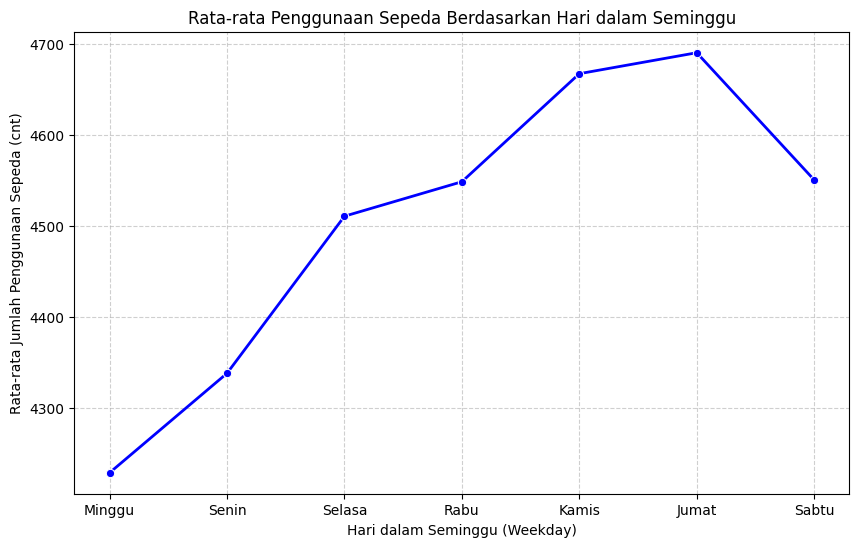

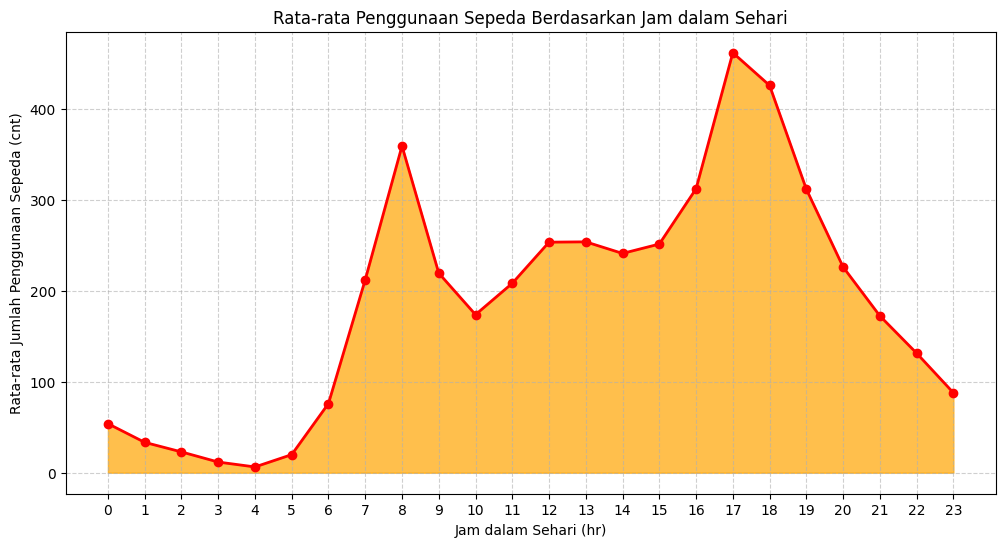

In [7]:
# Visualisasi tren penyewaan sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
weekday_avg = data_day_cleaned.groupby('weekday')['cnt'].mean().reset_index()
sns.lineplot(x='weekday', y='cnt', data=weekday_avg, marker='o', color='blue', linewidth=2)
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (Weekday)")
plt.ylabel("Rata-rata Jumlah Penggunaan Sepeda (cnt)")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Visualisasi tren penyewaan sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(12, 6))
hour_avg = data_hour_cleaned.groupby('hr')['cnt'].mean().reset_index()
plt.fill_between(hour_avg['hr'], hour_avg['cnt'], color='orange', alpha=0.7)
plt.plot(hour_avg['hr'], hour_avg['cnt'], marker='o', color='red', linewidth=2)
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Jam dalam Sehari")
plt.xlabel("Jam dalam Sehari (hr)")
plt.ylabel("Rata-rata Jumlah Penggunaan Sepeda (cnt)")
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Pertanyaan 2: - Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan pengguna terdaftar jika dilihat berdasarkan hari dalam seminggu dan waktu tertentu dalam sehari?

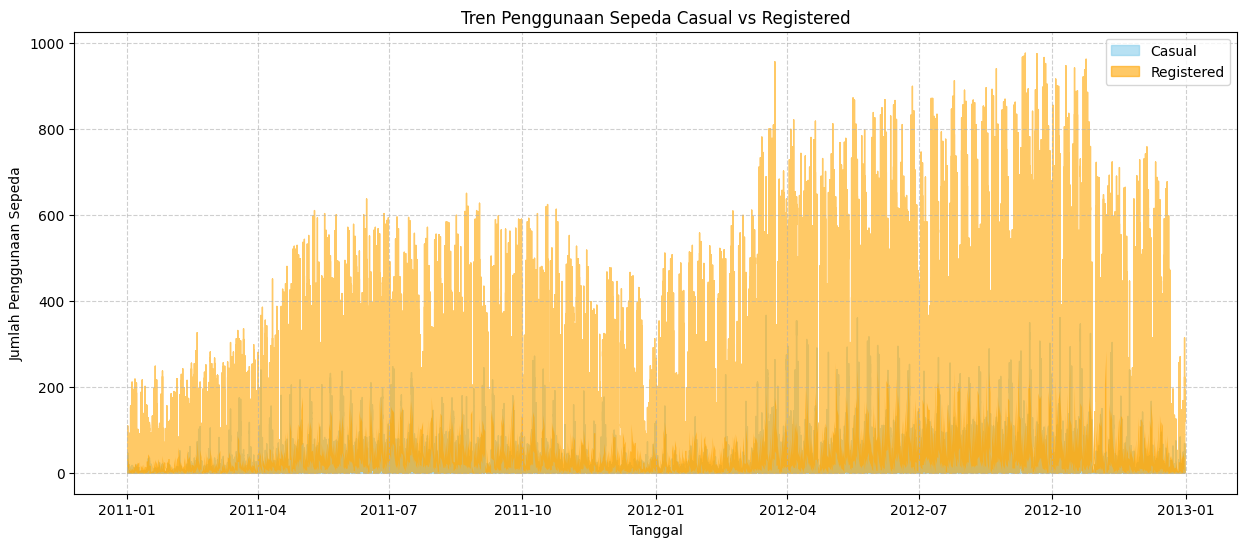

In [8]:
# Visualisasi time series untuk casual dan registered
data_hour_cleaned['dteday'] = pd.to_datetime(data_hour_cleaned['dteday'])
plt.figure(figsize=(15, 6))
plt.fill_between(data_hour_cleaned['dteday'], data_hour_cleaned['casual'], color='skyblue', alpha=0.6, label='Casual')
plt.fill_between(data_hour_cleaned['dteday'],
                 data_hour_cleaned['casual'] + data_hour_cleaned['registered'],
                 data_hour_cleaned['casual'], color='orange', alpha=0.6, label='Registered')
plt.title('Tren Penggunaan Sepeda Casual vs Registered')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Insight
- Pengguna Registered: Lebih sering menyewa sepeda, terutama selama jam sibuk pada hari kerja, mengindikasikan penggunaan yang dominan untuk keperluan komuter.

- Pengguna Casual: Cenderung lebih banyak menyewa sepeda di akhir pekan dengan pola penggunaan yang lebih merata sepanjang hari, menunjukkan preferensi untuk aktivitas rekreasi.

- Hari: Penggunaan sepeda mencapai puncaknya pada hari kerja, khususnya Selasa hingga Kamis, sementara akhir pekan menunjukkan tingkat penggunaan yang lebih rendah.

- Jam: Aktivitas penyewaan memuncak pada jam sibuk pagi dan sore hari kerja, mendukung pola penggunaan untuk perjalanan komuter. Penggunaan cenderung menurun pada malam hingga dini hari.

## Conclusion

Conclusion:

Jawaban atas Pertanyaan Bisnis:

1. Seperti apa pola penyewaan sepeda berdasarkan hari dalam seminggu atau waktu tertentu dalam sehari?

Aktivitas penyewaan sepeda paling tinggi terjadi pada hari kerja (Senin-Jumat), terutama selama jam sibuk (sekitar pukul 7-9 pagi dan 5-7 sore), yang mengindikasikan penggunaan sepeda untuk perjalanan komuter atau keperluan kerja.
Pada akhir pekan (Sabtu-Minggu), tingkat penyewaan sepeda menurun dibandingkan hari kerja.

2. Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan pengguna terdaftar jika dilihat berdasarkan hari dalam seminggu dan waktu tertentu dalam sehari?

Pengguna casual lebih sering menggunakan sepeda untuk tujuan rekreasi, dengan pola penggunaan yang meningkat di akhir pekan dan pada siang hari.
Pengguna registered menunjukkan pola penggunaan yang lebih tinggi pada hari kerja dan jam sibuk, mengindikasikan dominasi penggunaan untuk perjalanan komuter.
Saran dan Rekomendasi:

- Optimalisasi Alokasi Sepeda: Tambahkan sepeda di lokasi strategis selama hari kerja dan jam sibuk, serta di area rekreasi pada akhir pekan.
Strategi Pemasaran: Buat program loyalitas untuk pengguna registered dan promosikan paket rekreasi yang menarik bagi pengguna casual.
Penyesuaian Harga: Terapkan model harga dinamis yang disesuaikan dengan permintaan, seperti tarif lebih tinggi di jam sibuk.
Peningkatan Infrastruktur: Tambahkan stasiun penyewaan di lokasi strategis dan tingkatkan kualitas infrastruktur yang ada.
Kerjasama: Bangun kemitraan dengan hotel dan tempat wisata untuk menawarkan paket penyewaan sepeda yang menarik.